# Midterm-Fall 2019 by Chengjun Liu

## Case 1

1.(2 points) What is the average attrition rate for each recruiting channel? Sort your result in descending
attrition rate order.

In [152]:
import pandas as pd
import numpy as np

In [153]:
recruitment=pd.read_csv('recruitment.csv')
recruitment.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [154]:
recruitment.groupby('recruiting_source')['attrition'].mean().sort_values(ascending=False)

recruiting_source
Search Firm       0.500000
Referral          0.333333
Campus            0.285714
Applied Online    0.246154
Name: attrition, dtype: float64

2. (2 points) Create a new variable called “performance_cat”. What is the average attrition rate for
both employee categories (low performers vs. high performers)


In [155]:
def perform_cat(x):
    if x==1 or x==2:
        return 'Low Performance'
    else:
        return 'High Performance'



recruitment['performance_cat']=recruitment['performance_rating'].apply(perform_cat)

In [156]:
recruitment.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source,performance_cat
0,1,3,1.088190,Applied Online,High Performance
1,0,3,2.394173,NaN,High Performance
2,1,2,0.497530,Campus,Low Performance
3,0,2,2.513958,NaN,Low Performance
4,0,3,1.424789,Applied Online,High Performance


In [157]:
recruitment.groupby('performance_cat')['attrition'].mean()

performance_cat
High Performance    0.213213
Low Performance     0.212389
Name: attrition, dtype: float64

3. (2 points) Create a barchart (exact copy of the one below) to show the the average sales quota for all
employees hired through different channels.

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline
channel=recruitment.groupby('recruiting_source')['sales_quota_pct'].mean().sort_values().reset_index(name='Rate')
channel.head()

,recruiting_source,Rate
0,Search Firm,0.886960
1,Campus,0.908035
2,Referral,1.023198
3,Applied Online,1.058590


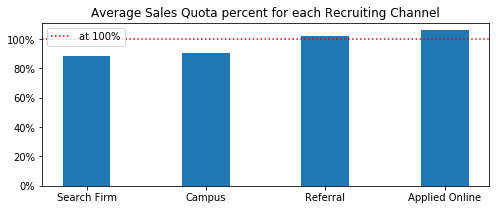

In [159]:
plt.figure(figsize=(8,3))
plt.bar(channel['recruiting_source'],channel['Rate'],width=0.4)
ax=plt.gca()
ax.set_yticklabels([str(i)+'%' for i in np.arange(0,101,20)])
plt.axhline(y=1,linestyle='dotted',color='red',label='at 100%')
plt.title('Average Sales Quota percent for each Recruiting Channel')
plt.legend()
plt.show()

## Case 2

4. (2 points) Create a side-by-side boxplot (see below) to show the distribution of satisfaction scores for
your bank (“Financial Savings”) and your competitors.

In [160]:
bankindex=pd.read_csv('bankindex.csv')
bankindex.head()

,Bank,Year,Score
0,Bank 1,2013,824.526701
1,Bank 1,2014,846.194064
2,Bank 1,2015,845.596861
3,Bank 1,2016,846.757909
4,Bank 1,2017,865.308433


In [161]:
Bank1=bankindex[bankindex['Bank']=='Bank 1']
Bank2=bankindex[bankindex['Bank']=='Bank 2']
Bank3=bankindex[bankindex['Bank']=='Bank 3']
Bank4=bankindex[bankindex['Bank']=='Bank 4']
Bank5=bankindex[bankindex['Bank']=='Bank 5']
Bank6=bankindex[bankindex['Bank']=='Bank 6']
Bank7=bankindex[bankindex['Bank']=='Bank 7']
Bank8=bankindex[bankindex['Bank']=='Bank 8']
Bank9=bankindex[bankindex['Bank']=='Bank 9']
Financial=bankindex[bankindex['Bank']=='Financial Savings']
banklist=['Bank1','Bank2','Bank3','Bank4','Bank5','Bank6','Bank7','Bank8','Bank9','Financial Savings']

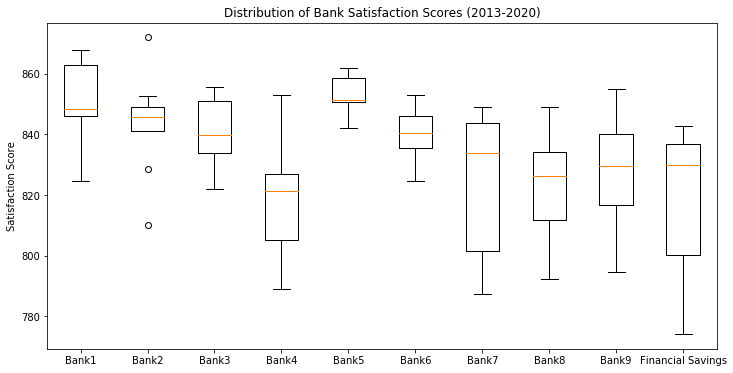

In [162]:
plt.figure(figsize=(12,6))
plt.boxplot([Bank1['Score'],Bank2['Score'],\
             Bank3['Score'],Bank4['Score'],\
             Bank5['Score'],Bank6['Score'],\
             Bank7['Score'],Bank8['Score'],\
             Bank9['Score'],Financial['Score']],labels=banklist)
plt.ylabel('Satisfaction Score')
plt.title('Distribution of Bank Satisfaction Scores (2013-2020)')
plt.show()

5. (2 points) Reproduce an exact copy of the following plot that compares your bank’s performance to
your competitors as well as the industry average pver the years (2013-2020) (Note that the industry
average is added at the very end of the dataset).


In [163]:
banklist=bankindex['Bank'].unique()
year=bankindex['Year'].unique()
print(year)
print(banklist)

[2013 2014 2015 2016 2017 2018 2019 2020]
['Bank 1' 'Bank 10' 'Bank 11' 'Bank 12' 'Bank 13' 'Bank 14' 'Bank 15'
 'Bank 16' 'Bank 17' 'Bank 18' 'Bank 19' 'Bank 2' 'Bank 20' 'Bank 21'
 'Bank 22' 'Bank 3' 'Bank 4' 'Bank 5' 'Bank 6' 'Bank 7' 'Bank 8' 'Bank 9'
 'Financial Savings' 'Industry Average']


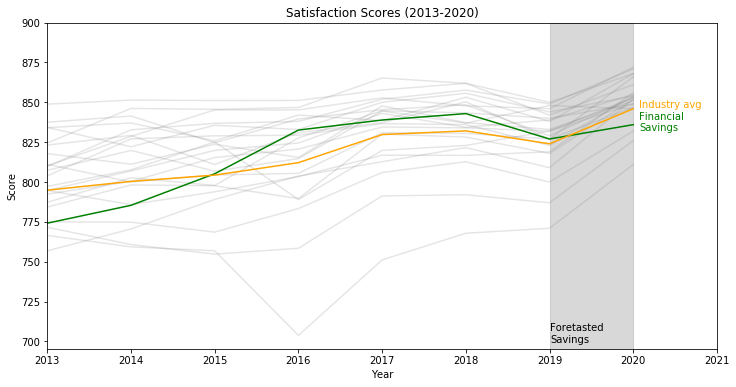

In [164]:
plt.figure(figsize=(12,6))
for i in np.arange(22):
    plt.plot(year,bankindex.loc[bankindex['Bank']==banklist[i],'Score'],color='grey',alpha=0.2)

plt.plot(year,bankindex.loc[bankindex['Bank']==banklist[22],'Score'],color='green')
plt.plot(year,bankindex.loc[bankindex['Bank']==banklist[23],'Score'],color='orange')
plt.xlim((2013,2021))
plt.ylim(695.4001584350001,900)
plt.axvspan(xmin=2019,xmax=2020,color='grey',alpha=0.3)

greenend=bankindex[bankindex['Bank']=='Financial Savings']
greenend=greenend[greenend['Year']==2020]['Score']

orangeend=bankindex[bankindex['Bank']=='Industry Average']
orangeend=orangeend[orangeend['Year']==2020]['Score']

plt.figtext(x=0.81,y=0.683,s='Industry avg',color='orange')
plt.figtext(x=0.81,y=0.63,s='Financial\nSavings',color='green')
plt.figtext(x=0.707,y=0.14,s='Foretasted\nSavings')
plt.ylabel('Score')
plt.xlabel('Year')
plt.title('Satisfaction Scores (2013-2020)')
plt.show()
#bottom,top=plt.ylim()
#print(bottom)